<h1> Introduction

To find the best neighborhood in Pittsburgh, we decided that walkability, safety, and education were the most important parts in determining the best neighborhood. We used graphs and datasets to come to a conclusion. 

<h1> Metric: Walkability

The dataset we used for walkability is from the Western Pennsylvania Regional Data Center. Walkability is important because not everyone can afford a car or the use of other forms of transportation. Also, having the convenience to walk everywhere is very nice. The data set uses "Walk Scores" which are based on distance, density, traffic, block length, and intersection density. Points are awared based on these factors. A high walk score correlates with convenient locations of important places such as school, stores, and restaurants. 

In [2]:
import pandas as pd

data = pd.read_csv("walkScores.csv")

data

,Census Tract,Walk Score
0,10300,82
1,20100,100
2,20300,83
3,30500,77
4,40200,71
...,...,...
397,981000,54
398,981100,51
399,981200,75
400,981800,35


These are the walk scores for all the neighborhoods in my data set. The census tract numbers represent the neighborhoods in number form. Later in the code, I will have to convert the census tracts to the actual name of the neighborhoods. 

In [3]:
data = data.sort_values(by='Walk Score', ascending = False).head(20)
data

,Census Tract,Walk Score
1,20100,100
177,445500,97
16,70300,91
14,60300,91
20,70900,89
80,220600,89
55,140800,88
19,70800,88
17,70500,88
15,60500,88


This shows the top 20 neighborhoods in terms of their walkability.

In [4]:
censusTractData = pd.read_csv("censusTracts.csv")
censusTractData

,_id,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,...,dpwdiv,unique_id,sectors,shape_le_1,shape_ar_1,tract,cdbg2014,tracttext,shape_length,shape_area
0,3433,1,0.0,42.0,3.0,40500.0,1.0,4.200304e+11,Block Group 1,G5030,...,3.0,113.0,14.0,11526.863222,7.843108e+06,405.0,Yes,405.0,0.033453,5.009289e-05
1,3434,2,1.0,42.0,3.0,40400.0,1.0,4.200304e+11,Block Group 1,G5030,...,3.0,25.0,14.0,20941.386025,1.390463e+07,404.0,Yes,404.0,0.020358,2.076625e-05
2,3435,3,2.0,42.0,3.0,40200.0,2.0,4.200304e+11,Block Group 2,G5030,...,3.0,21.0,14.0,18271.426385,5.999801e+06,402.0,Yes,402.0,0.059867,5.915794e-05
3,3436,4,3.0,42.0,3.0,30500.0,2.0,4.200303e+11,Block Group 2,G5030,...,3.0,19.0,15.0,15696.759230,7.202139e+06,305.0,Yes,305.0,0.050198,7.104398e-05
4,3437,5,5.0,42.0,3.0,20300.0,1.0,4.200302e+11,Block Group 1,G5030,...,1.0,23.0,13.0,23903.077852,1.694785e+07,203.0,No,203.0,0.077581,1.671798e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,3567,140,57.0,42.0,3.0,250700.0,1.0,4.200325e+11,Block Group 1,G5030,...,1.0,25.0,3.0,11711.301248,6.050988e+06,2507.0,Yes,2507.0,0.038391,5.968964e-05
135,3568,141,148.0,42.0,3.0,270400.0,1.0,4.200327e+11,Block Group 1,G5030,...,1.0,81.0,2.0,37157.434470,2.852668e+07,2704.0,Yes,2704.0,0.029147,4.199153e-05
136,3569,142,217.0,42.0,3.0,980800.0,1.0,4.200398e+11,Block Group 1,G5030,...,3.0,19.0,14.0,19242.503109,1.416973e+07,9808.0,No,9808.0,0.052368,4.154919e-05
137,3570,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,0.002660,1.732354e-07


This represents the Census Tracts as well as the name of the neighborhood that correlates with the tract number. 
Next, I will use this data set to manually change the Census Tract numbers on the top 10 neighborhoods in terms of walkability. 

In [5]:
censusTractList = ['Central Business District', 'Sewickley', 'Shadyside', 'Lower Lawrenceville', 'Shadyside', 'Central Northside',
                  'Squirrel Hill South', 'Shadyside', 'Shadyside', 'Polish Hill', 'Bloomfield', 'Bloomfield',
                  'Central Lawrenceville', 'Bloomfield', 'East Liberty', 'Friendship', 'Allegheny Center', 'South Side Flats',
                  'Central Northside', 'Mount Lebanon']
data['Census Tract'] = censusTractList

data_edited = data.drop_duplicates(subset=['Census Tract']).head(10)

data_edited

,Census Tract,Walk Score
1,Central Business District,100
177,Sewickley,97
16,Shadyside,91
14,Lower Lawrenceville,91
80,Central Northside,89
55,Squirrel Hill South,88
15,Polish Hill,88
28,Bloomfield,86
27,Central Lawrenceville,86
39,East Liberty,86


In this code, I first created an array that holds the names of the neighborhoods in order of walkability. I used this to convert the column of "Census Tract" to the array of neighborhood names. I then dropped the duplicate neighborhoods and only showed the top 10. This code drops the same neighborhoods and returns the top 10 neighborhoods in terms of walkability. 

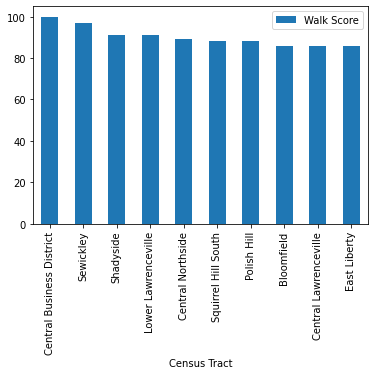

In [6]:
data_edited.plot.bar(x = 'Census Tract', y = 'Walk Score')

This shows a bar graph of the top 10 neigbhorhoods in terms of walkability.

As you can see, all of these neighborhoods have very good walkability. There isn't too much of a difference to say that one is so much greater than the other. 

<h1>Summary

There isn't much discrepancy between the top ten neighborhoods in terms of walk score. Obviously, the best neighborhood for walkability is the Central Business District, but any one of these neighborhoods would fit. I think this dataset is a good blueprint for what options we could choose for the best neighborhood.

<h1> Metric: Safety

Safety is a important factor when choosing which neighborhood to live, and the number of arrests in each neighborhood is one of the ways to represent how safe a neighborhood is. Finding the percentange of arrests in terms of population is the best way that I found to determine which neighborhood would be the best to live in. In this notebook, I will be counting the number of police arrests compared to the population in each neighborhood, and concluding which one would be the safest.

In [1]:
import pandas as pd
arrest = pd.read_csv("arrests.csv")
arrest.head()

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


In [3]:
ndict = dict()

for index, row in arrest.iterrows():
    place = row["INCIDENTNEIGHBORHOOD"]
    if place in ndict:
        ndict[place] += 1
    else:
        ndict[place] = 1

Created a dictionary to collect the neighboorhood and count the number of arrests in each, this a way to exclude every other column

In [4]:
df = pd.DataFrame.from_dict(ndict, orient = 'index', columns =['number_arrests'])
df

,number_arrests
Bloomfield,968
Outside City,309
Westwood,222
East Allegheny,2153
Crafton Heights,585
...,...
Ridgemont,37
Swisshelm Park,42
Hays,117
Chartiers City,44


Created a new data frame using the dictionary

In [9]:
df.sort_values(by = 'number_arrests', ascending = True).head(10)

,number_arrests
Mt. Oliver Neighborhood,2
Troy Hill-Herrs Island,6
Mt. Oliver Boro,18
Central Northside,23
Regent Square,36
Ridgemont,37
New Homestead,39
Swisshelm Park,42
Chartiers City,44
East Carnegie,48


Sorted the data frame to display the top 10 neighborhoods with least number of arrests

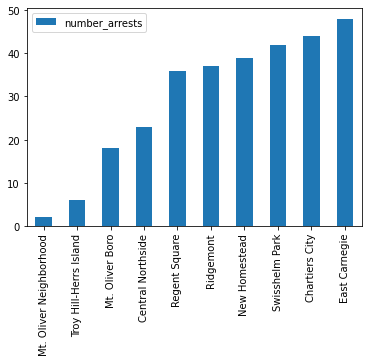

In [8]:
df.sort_values(by = 'number_arrests', ascending = True).head(10).plot(kind="bar")

Used a bar graph to display the top 10 neighborhoods with the least arrests

However, I decided to take population of each neighborhood in consideration and find the crime rate in each neighborhood

In [11]:
population = pd.read_csv("population.csv")
population.head(10)

,Neighborhood,2010_Total_Population,2010_OneRace_Population,2010_White_Alone_Population,2010_Black_Alone_Population,2010_American_Indian_and_Alaska_Native_alone_population,2010_Asian_Alone_Population,2010_Native_Hawaiian_and_Other_Pacific_Islander_alone_Population,2010_Any_other_single_race_alone_Popualtion,2010_Population_two_or_more_races,...,Change_2010_to_2020_Total_Population,Change_2010_to_2020_OneRace_Population,Change_2010_to_2020_White_Alone_Population,Change_2010_to_2020_Black_Alone_Population,Change_2010_to_2020_American_Indian_and_Alaska_Native_alone_population,Change_2010_to_2020_Asian_Alone_Population,Change_2010_to_2020_Native_Hawaiian_and_Other_Pacific_Islander_alone_Population,Change_2010_to_2020_Any_other_single_race_alone_Popualtion,Change_2010_to_2020_Population_two_or_more_races,Change_2010_to_2020_Hispanic_or_Latino_Population
0,Allegheny Center,933,896,381,453,4,56,1,1,37,...,486,441,302,-63,4,179,0,19,45,23
1,Allegheny West,462,448,354,84,1,7,0,2,14,...,78,45,72,-52,0,9,1,15,33,28
2,Allentown,2500,2384,1485,878,9,1,0,11,116,...,-195,-258,-213,-93,-6,18,6,30,63,23
3,Arlington - Arlington Heights (Combined),2113,2042,1452,576,9,3,0,2,71,...,-73,-153,-246,44,-4,9,0,44,80,39
4,Banksville,4144,4053,3651,169,2,211,0,20,91,...,-17,-197,-460,25,5,174,2,57,180,102
5,Bedford Dwellings,1202,1166,48,1106,8,3,0,1,36,...,184,161,3,156,2,0,0,0,23,6
6,Beechview,7974,7763,6454,963,8,125,1,212,211,...,-378,-761,-997,-60,38,32,3,223,383,336
7,Beltzhoover,1925,1834,191,1604,11,3,2,23,91,...,-321,-374,-3,-424,-4,11,-2,48,53,53
8,Bloomfield,8442,8255,6886,739,11,542,3,74,187,...,223,-136,-123,-219,1,143,-2,64,359,192
9,Bluff,6600,6513,4345,2057,13,73,2,23,87,...,-718,-771,-752,-160,23,49,-2,71,53,170


In [13]:
pdict = dict()

for index, row in population.iterrows():
    neighborhood = row["Neighborhood"]
    pop = row["2020_Total_Population"]
    if pop in pdict:
        pdict[neighborhood] = pop
    else:
        pdict[neighborhood] = pop

Created a dictionary exactly as I did for the number of arrests

In [14]:
ndf = pd.DataFrame.from_dict(pdict, orient = 'index', columns =['population'])
ndf

,population
Allegheny Center,1419
Allegheny West,540
Allentown,2305
Arlington - Arlington Heights (Combined),2040
Banksville,4127
...,...
Upper Lawrenceville,2394
West End,205
West Oakland,2534
Westwood,3332


Created a new data frame using the dictionary

In [15]:
merged = df.join(ndf, how = "outer")
merged

,number_arrests,population
NaN,2434.0,NaN
Allegheny Center,1227.0,1419.0
Allegheny West,127.0,540.0
Allentown,930.0,2305.0
Arlington,302.0,NaN
...,...,...
Upper Lawrenceville,187.0,2394.0
West End,280.0,205.0
West Oakland,311.0,2534.0
Westwood,222.0,3332.0


In [16]:
merged.sort_values(by = 'number_arrests', ascending = True).head(10)

,number_arrests,population
Mt. Oliver Neighborhood,2.0,NaN
Troy Hill-Herrs Island,6.0,NaN
Mt. Oliver Boro,18.0,NaN
Central Northside,23.0,2972.0
Regent Square,36.0,971.0
Ridgemont,37.0,390.0
New Homestead,39.0,917.0
Swisshelm Park,42.0,1339.0
Chartiers City,44.0,492.0
East Carnegie,48.0,491.0


 Merged the two data frames

In [17]:
merged['arrests_percentage'] = merged.apply(lambda row: (row['number_arrests'] / row['population']) * 100, axis=1)
merged.sort_values(by = 'arrests_percentage', ascending = True).head(20)

,number_arrests,population,arrests_percentage
Central Northside,23.0,2972.0,0.773890
Squirrel Hill North,284.0,11879.0,2.390774
Swisshelm Park,42.0,1339.0,3.136669
Regent Square,36.0,971.0,3.707518
North Oakland,433.0,10691.0,4.050136
New Homestead,39.0,917.0,4.252999
Stanton Heights,219.0,4427.0,4.946917
Squirrel Hill South,808.0,15317.0,5.275184
Point Breeze,297.0,5348.0,5.553478
Morningside,185.0,3252.0,5.688807


Calculate the percetange of number of arrests in relation to the population and printed the top ten neighborhoods with the lowest percentage

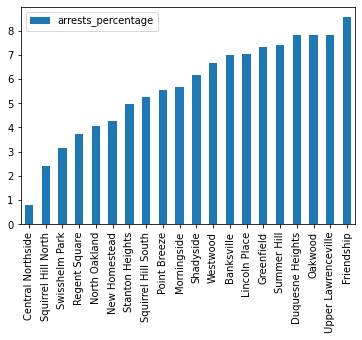

In [18]:
ratio = merged.drop(['number_arrests', 'population'], axis = 1)
ratio.sort_values(by = 'arrests_percentage', ascending = True).head(20).plot(kind="bar")

Bar graphed the top 20 neighborhoods with the lowest percentage

<h1>Summary

Through a careful examination of arrest data compared with neighborhood population, I've found the percentage of arrests in each location. After the analysis, it appeared that Cental Northside has the lowest percentage at a mere 0.77%. This designates it as the safest and also position it as the best neighborhood to live in term of arrests in each location.